## 使用Naive Bayes 建立分類模型

In [147]:
import pandas
df = pandas.read_excel('data/yahoo_movie.xlsx', index_col=0)

In [148]:
df.head()

,content,stars,title,status
0,"不知道耶! 看完整個無感\r\n有種覺得就是女兒""給蕭""害死了老爸\r\n然後...既然可以...",3,古墓奇兵,soso
1,很好看的動作片，不會浪費錢跟時間。很久沒有這樣的探險片。可說是女版的印第安那瓊。女主角跟爸爸...,5,古墓奇兵,good
2,說這個不好看的話，那我還真不知道，還有什麼片是您可以去看得了。電影好看，但話說羅拉有裝可以撿...,5,古墓奇兵,good
3,父女重逢真的很讓人感動，五顆星。,5,古墓奇兵,good
4,劇情雖然老套，但仍拍出新意，古墓能殺人的方式不就是機關和毒，要求亂七八糟的觀眾，你看喪尸片看多了。,4,古墓奇兵,good


In [149]:
import jieba
corpus = []
tags   = []
for rec in df[df['status'].isin(['good', 'bad'])].iterrows():
    corpus.append(' '.join(jieba.cut(rec[1].content)))
    tags.append(rec[1].status)

In [150]:
corpus[0]

'很 好看 的 動作片 ， 不會 浪費 錢 跟 時間 。 很 久 沒有 這樣 的 探險 片 。 可 說 是 女版 的 印第安那 瓊 。 女 主角 跟 爸爸 還 有 反派 都 演 得到 位 。 陸任 的 男 配角 常 在 港片 看到 ， 很帥 。 一時 忘了 名字 。 希望 有 續集 。'

In [151]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [152]:
X.shape

(980, 4839)

In [153]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, tags, test_size = 0.2, random_state = 42)

In [154]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.01)
clf.fit(train_X, train_y)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [156]:
predicted = clf.predict(test_X)

In [157]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, predicted)

0.7142857142857143

In [158]:
confusion_matrix(test_y, predicted)

array([[51, 30],
       [26, 89]])

## 深度學習

In [13]:
def softmax(e):
    return np.exp(e) / np.exp(e).sum() 
    
import numpy as np
a = np.array([2,7,1])

In [14]:
softmax(a)

array([0.00667641, 0.99086747, 0.00245611])

In [15]:
b = np.array([0.00667641, 0.99086747, 0.00245611])
b.sum()

0.99999999

In [16]:
c = np.array([0,1,0])
b - c

array([ 0.00667641, -0.00913253,  0.00245611])

In [17]:
def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

    
import numpy as np
a = np.array([2,7,1])

In [18]:
sigmoid_function(a)

array([0.88079708, 0.99908895, 0.73105858])

## 安裝 GENSIM

In [19]:
! pip install gensim

You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Gensim 使用方式

In [41]:
s = 'you say goodby and i say hello .'

from gensim.models import word2vec
model = word2vec.Word2Vec([s.split()], min_count=1, size=3) 

In [42]:
model

In [43]:
model.wv.vectors.shape

(7, 3)

In [44]:
model.wv.vectors

array([[-0.13190594,  0.11762448, -0.00629038],
       [-0.06928848,  0.12338193, -0.01034341],
       [-0.14628631, -0.14990619, -0.13047887],
       [ 0.1657063 , -0.03076699, -0.09294317],
       [-0.14430211,  0.16298111, -0.10189454],
       [-0.08324675,  0.04580065, -0.10287556],
       [-0.00766116, -0.12512954,  0.13616468]], dtype=float32)

In [45]:
model.wv.vocab

{'you': <gensim.models.keyedvectors.Vocab at 0x129553048>,
 'say': <gensim.models.keyedvectors.Vocab at 0x129553208>,
 'goodby': <gensim.models.keyedvectors.Vocab at 0x129553240>,
 'and': <gensim.models.keyedvectors.Vocab at 0x1295532b0>,
 'i': <gensim.models.keyedvectors.Vocab at 0x1295532e8>,
 'hello': <gensim.models.keyedvectors.Vocab at 0x129553320>,
 '.': <gensim.models.keyedvectors.Vocab at 0x129553358>}

In [46]:
s = 'you say goodby and i say hello .'

from gensim.models import word2vec
model = word2vec.Word2Vec([s.split()], min_count=1, size=2) 

In [47]:
model.wv.vectors

array([[-0.19785893,  0.17643672],
       [-0.10393272,  0.18507288],
       [-0.21942945, -0.22485928],
       [ 0.24855947, -0.04615048],
       [-0.21645318,  0.24447167],
       [-0.12487013,  0.06870098],
       [-0.01149174, -0.18769431]], dtype=float32)

In [52]:
model.wv.vocab.keys()

dict_keys(['you', 'say', 'goodby', 'and', 'i', 'hello', '.'])

In [48]:
X = model.wv.vectors

Populating the interactive namespace from numpy and matplotlib


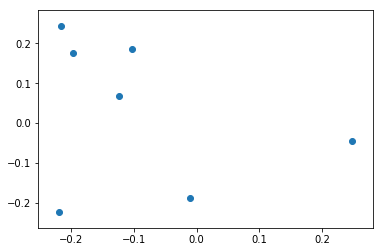

In [50]:
%pylab inline
from matplotlib import pyplot as plt
plt.scatter(X[:,0], X[:,1])

Populating the interactive namespace from numpy and matplotlib


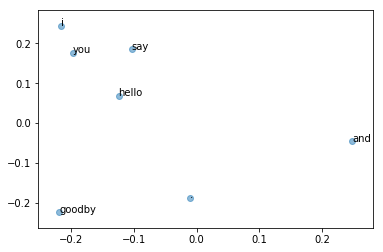

In [58]:
%pylab inline
from matplotlib import pyplot as plt
words = list(model.wv.vocab.keys())
for i in range(len(words)):
    #print(words[i])
    plt.annotate(words[i], (X[i, 0], X[i, 1]))
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.show()

In [59]:
model.most_similar('you')

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('i', 0.9774017333984375),
 ('say', 0.9457564353942871),
 ('hello', 0.8493059277534485),
 ('goodby', -0.2820505201816559),
 ('and', -0.6405924558639526),
 ('.', -0.8403661847114563)]

## 使用Word2Vec 進行分類

In [60]:
import pandas
df = pandas.read_excel('data/yahoo_movie.xlsx', index_col=0)

In [64]:
corpus = []
for e in df['content'].tolist():
    corpus.append(list(jieba.cut(e)))

In [72]:
from gensim.models import word2vec
model = word2vec.Word2Vec(corpus, min_count=10, size=50, iter=100) 

In [71]:
?word2vec.Word2Vec
#model.wv.vocab

In [80]:
model.most_similar('難看')

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('糟', 0.6102331280708313),
 ('好看', 0.5784004330635071),
 ('雜亂', 0.4525483250617981),
 ('差', 0.4513176381587982),
 ('爛', 0.4500066339969635),
 ('快', 0.362907350063324),
 ('⋯', 0.3600214421749115),
 ('普通', 0.35243484377861023),
 ('還要', 0.3515854775905609),
 ('真心', 0.33277419209480286)]

In [75]:
#model.wv.vocab

In [ ]:
! pip install /Users/davidchiu/Desktop/gensim-3.8.0.tar.gz

In [88]:
from gensim.models import word2vec

size = 10  # 產生多少維度 
min_count = 5 # 要算至少出現多少次數的字詞
workers = 1 # 使用多少個core 計算, -1 使用所有的core 進行計算 
window = 10  # 上下文的區間
iter = 300 # 神經網路訓練的迭代數
sample = 1e-5 # 取樣的數量
model = word2vec.Word2Vec(corpus, 
                          workers = workers,
                          sample = sample,
                          size = size,
                          min_count=min_count,
                          window = window,
                          iter = iter)



In [90]:
#model.wv.vocab

In [159]:
model.most_similar('好片')

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('屌', 0.9873900413513184),
 ('氣氛', 0.987124502658844),
 ('在一起', 0.9864601492881775),
 ('值得', 0.9856245517730713),
 ('喔', 0.9851853847503662),
 ('囉', 0.9846028685569763),
 ('來', 0.9827703237533569),
 ('唯一', 0.9824857711791992),
 ('古墓', 0.9820506572723389),
 ('才', 0.9817382097244263)]

## 使用word2vec  做文字分類

In [94]:
import pandas
df = pandas.read_excel('data/yahoo_movie.xlsx', index_col=0)

In [111]:
import jieba
corpus = []
tags   = []
for rec in df[df['status'].isin(['good', 'bad'])].iterrows():
    corpus.append(list(jieba.cut(rec[1]['content'])))
    tags.append(rec[1]['status'])

In [112]:
from gensim.models import word2vec

size = 50  # 產生多少維度 
min_count = 5 # 要算至少出現多少次數的字詞
workers = 1 # 使用多少個core 計算, -1 使用所有的core 進行計算 
window = 10  # 上下文的區間
iter = 300 # 神經網路訓練的迭代數
sample = 1e-5 # 取樣的數量
model = word2vec.Word2Vec(corpus, 
                          workers = workers,
                          sample = sample,
                          size = size,
                          min_count=min_count,
                          window = window,
                          iter = iter)

In [114]:
#model.wv.vocab

In [115]:
import numpy as np
vec = np.zeros(size).reshape((1, size))
vec.shape

(1, 50)

In [116]:
vec

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [120]:
cnt = 0

for w in corpus[0]:
    if w in model:
        #print(w, model[w])
        vec += model[w]
        cnt += 1
vec / cnt

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  after removing the cwd from sys.path.
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[ 4.14836643e-01, -3.98676539e-01,  4.36587637e-01,
         4.32628862e-01, -2.47301055e-01, -2.14094743e-01,
         6.36092473e-02,  4.32064281e-02,  1.25435153e-01,
        -9.68969495e-01,  2.40403324e-01,  1.34817976e-01,
         3.58330657e-01, -4.28311526e-01, -9.21367077e-02,
         5.17471920e-01,  6.20584522e-02,  5.90776255e-01,
         1.32624670e+00,  2.24248597e-01,  5.06548911e-01,
        -6.18105982e-01,  8.20739280e-01,  6.09204746e-01,
         5.34344771e-01, -7.29854964e-01, -2.76716522e-01,
         1.31554507e-01,  1.38972756e-01, -6.11894508e-01,
        -8.58816517e-01,  2.61624200e-01, -4.42699214e-01,
         3.35187214e-01, -7.75294933e-04, -1.53520707e-01,
        -1.25851653e-01, -6.94332820e-02,  3.63292964e-01,
         2.74051482e-01, -3.70304758e-01, -5.61534748e-01,
        -1.01263385e+00, -1.90275518e-02, -2.87387331e-01,
         4.85446466e-01,  3.34943990e-01,  8.55101512e-01,
         2.76073989e-01, -5.74011020e-01]])

In [133]:
import numpy as np
vecs = []
vec = np.zeros(size).reshape((1, size))
cnt = 0
for s in corpus:
    for w in s:
        if w in model:
            #print(w, model[w])
            vec += model[w].reshape((1, size))
            cnt += 1
    vecs.append(vec / cnt)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [134]:
len(vecs)

980

In [135]:
vecs[0].shape

(1, 50)

In [136]:
X = np.concatenate(vecs, axis = 0)

In [137]:
X.shape

(980, 50)

In [138]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, tags, test_size = 0.2, random_state = 42)

In [142]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(train_X, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [144]:
predicted = clf.predict(test_X)

In [145]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, predicted)

0.6020408163265306

In [146]:
confusion_matrix(test_y, predicted)

array([[47, 34],
       [44, 71]])

## TensorFlow

In [160]:
! pip install tensorflow
# pip install tensorflow-gpu

    100% |████████████████████████████████| 337kB 947kB/s ta 0:00:01
  Found existing installation: Werkzeug 0.9.6
    Uninstalling Werkzeug-0.9.6:
      Successfully uninstalled Werkzeug-0.9.6
You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [161]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [162]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [163]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 
n_samples  = mnist.train.num_examples

In [164]:
with tf.name_scope('inputs'):
    x = tf.placeholder("float", [None, n_input], name= 'input_x')
    y = tf.placeholder("float", [None, n_classes], name= 'input_y')

In [165]:
with tf.name_scope('input_reshape'):
    image_input = tf.reshape(x,[-1,28,28,1])
    tf.summary.image('input', image_input, 10)

In [166]:
def add_layer(x, input_tensors, output_tensors, layer_name, activation_function = None):  
    with tf.name_scope('Layer'):
        with tf.name_scope('Weights'):
            weight = tf.Variable(tf.random_normal([input_tensors, output_tensors]), name = 'w')
            tf.summary.histogram(name = layer_name + '/Weights', values = weight)
        with tf.name_scope('Bias'):
            bias = tf.Variable(tf.random_normal([output_tensors]), name= 'b')
            tf.summary.histogram(name = layer_name + '/Bias', values = bias)
        with tf.name_scope('Wx_plus_b'):
            formula = tf.add(tf.matmul(x, weight), bias)
        if activation_function is None:
            outputs = formula
        else:
            outputs = activation_function(formula)
        tf.summary.histogram(name = layer_name + '/Outputs', values = outputs)
        return outputs

In [167]:
layer1 = add_layer(x, input_tensors = n_input, output_tensors = n_hidden_1, layer_name='layer1',activation_function = tf.nn.relu)
layer2 = add_layer(layer1, input_tensors = n_hidden_1, output_tensors = n_hidden_2, layer_name='layer2',activation_function = tf.nn.relu)
out_layer = add_layer(layer2, input_tensors = n_hidden_2, output_tensors = n_classes, layer_name='out_layer',activation_function = None)

In [168]:
with tf.name_scope('cost'):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=y))
    tf.summary.scalar('loss', cost)
    
with tf.name_scope('optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    
with tf.name_scope('Accuracy'):
    acc = tf.equal(tf.argmax(out_layer, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))
    tf.summary.scalar("accuracy", acc)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [169]:
init = tf.global_variables_initializer()

In [170]:
merged = tf.summary.merge_all()

with tf.Session() as sess:
    sess.run(init)

    ## Merge Summary
    
    writer = tf.summary.FileWriter("tensorboard2/", graph = sess.graph)

    for epoch in range(training_epochs):
        avg_cost = 0.0
        total_batch = int(n_samples/batch_size)
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c,result = sess.run([optimizer, cost,merged], feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch
            ## Adding summary of each step
            writer.add_summary(result,  epoch * total_batch + i)

        print("Epoch: {} cost={}".format(epoch+1,avg_cost))

    print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=153.98696717695748
Epoch: 2 cost=59.85513640317052
Epoch: 3 cost=44.49826552130955
Epoch: 4 cost=36.21848631338643
Epoch: 5 cost=30.83456163319674
Epoch: 6 cost=26.681236736124188
Epoch: 7 cost=23.78706894137643
Epoch: 8 cost=21.330923768173562
Epoch: 9 cost=19.411034850776197
Epoch: 10 cost=17.744112639427172
Epoch: 11 cost=16.398108545433384
Epoch: 12 cost=15.213994324965906
Epoch: 13 cost=14.134885062767783
Epoch: 14 cost=13.208053894313885
Epoch: 15 cost=12.403907239599656
Training Completed in 15 Epochs


## Keras

In [171]:
! pip install keras

You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [172]:
import keras

Using TensorFlow backend.


In [173]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense

In [179]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [180]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [181]:
n_classes  = 10 
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

In [182]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 

training_epochs = 15
batch_size = 100

In [183]:
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [184]:

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 38us/step - loss: 1.0523 - acc: 0.7554 - val_loss: 0.4846 - val_acc: 0.8804
Epoch 2/15
60000/60000 [==============================] - 2s 32us/step - loss: 0.4222 - acc: 0.8875 - val_loss: 0.3537 - val_acc: 0.9015
Epoch 3/15
60000/60000 [==============================] - 2s 32us/step - loss: 0.3436 - acc: 0.9037 - val_loss: 0.3063 - val_acc: 0.9133
Epoch 4/15
60000/60000 [==============================] - 2s 31us/step - loss: 0.3069 - acc: 0.9133 - val_loss: 0.2785 - val_acc: 0.9214
Epoch 5/15
60000/60000 [==============================] - 2s 32us/step - loss: 0.2824 - acc: 0.9193 - val_loss: 0.2605 - val_acc: 0.9265
Epoch 6/15
60000/60000 [==============================] - 2s 31us/step - loss: 0.2634 - acc: 0.9254 - val_loss: 0.2447 - val_acc: 0.9316
Epoch 7/15
60000/60000 [==============================] - 2s 32us/step - loss: 0.2477 - acc: 0.9299 - val_loss: 0.2338 - val_acc